First, we generate the dummy dataset to be used by the sequence-to-sequence model for training and validation. 

We generate 30 fake shots. Each shot is a timeseries of signal values. The temporal shape of the signal, and the switches in the baseline signal values, indicate changes in the state of the underlying fusion plasma. For each timestep, three possible output classifications exist. 

Generating 30 shots.


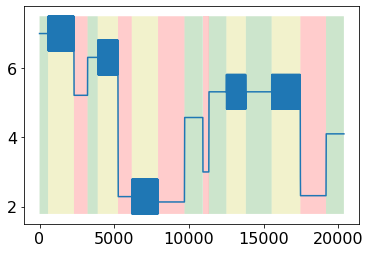

In [4]:
from dummy_data import dummy_data

number_of_shots = 30
dummy_data([number_of_shots,])

Here, one sample dummy shot can be seen. The blue line represents the dummy signal values, while the colored background represents the corresponding shifts in plasma states (each color represents one different state). A classifier will have to learn to detect changes in the signal to make an accurate classification of what state the plasma is in at a particular point in time. 

Next, we run the data_generator method that will be called during the training loop to generate batches of training data. Here, we wish only to see a sample of the data that will be fed to the seq2seq model. The idea is to use this as a 'reality check', to make sure the data is properly formatted before training the model. 

Data generator ready. Read 30 shot files.


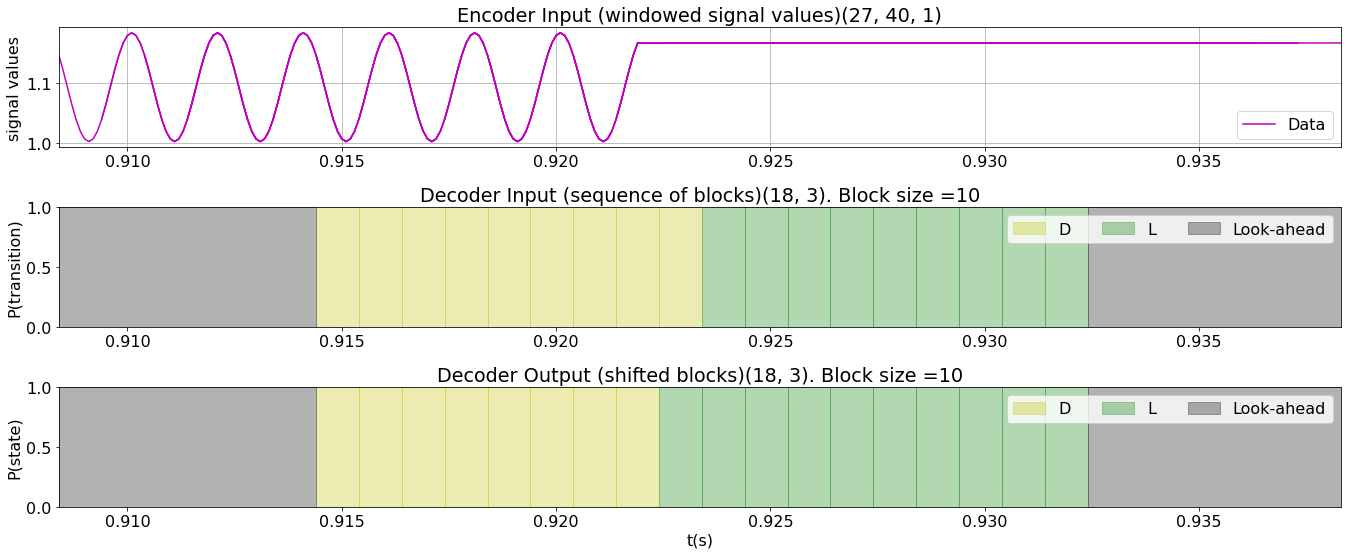

In [5]:
from sequence_to_sequence_data_generator import data_generator_main
data_generator_main()

Everything seems to be in order. The top plot shows dummy signal values extracted from a particular region of a dummy shot. The lower plot indicates the matching dummy plasma state (i.e. a class) which the model must match with the signal values. The middle plot is a time-shift of the lower plot, by a single timestep. It will be used as a decoder input only if we specify that we want to use teacher forcing during training. Otherwise, the decoder input at each timestep t will simply be its own output from t-1. 

We now train the seq2seq model and save its results in directory 'exp_1'. 

We select 80% of the shots for training, and the remainder for validation after the training is finished. We monitor the the training progression only with the training loss and accuracy. 

In [6]:
from tf_seq_to_seq_run import train_main
train_main(['exp_1'])

randomized train shot ids ['00020', '00021', '00003', '00005', '00007', '00016', '00026', '00013', '00000', '00015', '00022', '00008', '00017', '00011', '00009', '00028', '00014', '00002', '00006', '00010', '00027', '00025', '00029', '00018'] 24 shots
randomized val shots ids ['00012', '00024', '00004', '00023', '00019', '00001'] 6 shots
Data generator ready. Read 24 shot files.
----------------------------------------------------------
Starting training...
Epoch 1 Loss 0.8950 Acc 0.5478
Epoch 2 Loss 0.6046 Acc 0.7553
Epoch 3 Loss 0.4057 Acc 0.8353
Epoch 4 Loss 0.2513 Acc 0.9086
Epoch 5 Loss 0.2623 Acc 0.8658
Epoch 6 Loss 0.1870 Acc 0.9367
Epoch 7 Loss 0.1493 Acc 0.9467
Epoch 8 Loss 0.1224 Acc 0.9505
Epoch 9 Loss 0.1126 Acc 0.9622
Epoch 10 Loss 0.0924 Acc 0.9619
saving checkpoint...
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri multiple                  94

Training seems to have been successful -- when training finishes, the model accuracy on training data is above 0.9. Now, we test the trained model on the validation dummy shots, of which there are 6. We measure the results using Cohen's kappa score, which determines the overlap between sets of categorical data. A score of 1 indicates a perfect match, and a score of 0 indicates no match. The score is computed for each class, and as a weighted mean for all 3 classes.

fetching checkpoint from file ./../experiments/exp_1/k_fold_1/training_checkpoints/ckpt-1
----------------------------------------------------------------------------------------------------
will predict on the following 6 val shots: ['00001', '00004', '00012', '00019', '00023', '00024']
---------------------------Predicting/evaluating shot 00012 --------------------------------------------
(1, 21189, 4) 2106
Time taken for beam search 0:00:25.120049
Cohen`s kappa scores:  [0.95611262 0.99282364 0.96110538 0.96597881]
---------------------------Predicting/evaluating shot 00024 --------------------------------------------
(1, 21546, 4) 2142
Time taken for beam search 0:00:24.412286
Cohen`s kappa scores:  [0.7702601  0.99340827 0.71462547 0.80511693]
---------------------------Predicting/evaluating shot 00004 --------------------------------------------
(1, 20941, 4) 2082
Time taken for beam search 0:00:24.199871
Cohen`s kappa scores:  [0.9700404  0.99309236 0.96984398 0.97519384]
------

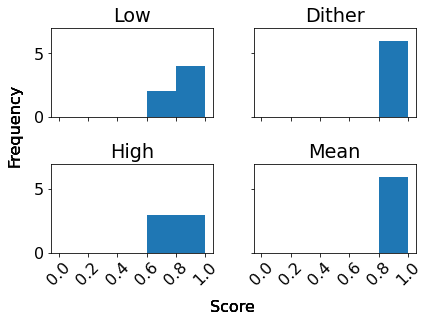

In [7]:
from tf_seq_to_seq_eval import eval_main

exp_id = 'exp_1'
num_beams = 1
save_checkpoint = 1
data_type = 'val'
eval_main([exp_id, num_beams, str(save_checkpoint), data_type])

Finally, we see that we obtained pretty good results for all validation shots, all of them having a mean score above 0.8.

